In [217]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m
from __future__ import print_function

In [235]:
X_matrix = np.genfromtxt('Martrix_X_streamingserver.csv', delimiter=';');
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv', delimiter=';');
y = np.genfromtxt('Martrix_Y_streamingserver.csv',delimiter=';')

#data = [1] * 3 + [2] * 3
#data *= 3
data = y[1:1050];
print(data)

[ 7.53333333  6.33333333  7.86666667 ...,  8.33333333  7.33333333
  7.26666667]


In [248]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [249]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 5, 1, 
                   hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [251]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 5
CYCLES = 20
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 100/100
final error = 9.61712478608


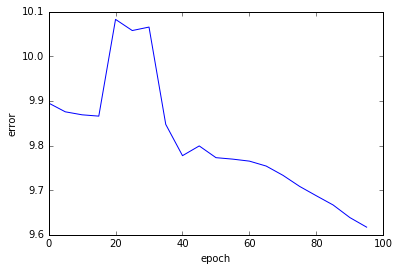

In [252]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')

In [253]:
#from sklearn.metrics import mean_squared_error
from math import sqrt
#from __future__ import math


sample = y[1050:1495];
target = y[1051:1496];
error = 0.0;
printl = 1;
eer = 0.0;
for i in range(np.size(sample)):
    error += (net.activate(sample[i])-sample[i])**2;
    if printl :
        print("               sample = %4.1f" % sample[i])
        print("predicted next sample = %4.1f" % net.activate(sample[i]))
        print("   actual next sample = %4.1f" % target[i])
        print()      
err = sqrt(error/np.size(sample));    
print("The Root Mean Squared Error ",err);
    
'''    
for i in range(np.size(y)-1):
    error += (y[i] - net.activate(y[i]))**2;
print('The error is Error = ', (error/np.size(y)))
'''

               sample =  7.4
predicted next sample =  7.7
   actual next sample =  8.4

               sample =  8.4
predicted next sample =  7.8
   actual next sample =  6.8

               sample =  6.8
predicted next sample =  7.7
   actual next sample =  7.1

               sample =  7.1
predicted next sample =  7.7
   actual next sample =  7.2

               sample =  7.2
predicted next sample =  7.7
   actual next sample =  8.4

               sample =  8.4
predicted next sample =  7.8
   actual next sample =  7.3

               sample =  7.3
predicted next sample =  7.7
   actual next sample =  7.3

               sample =  7.3
predicted next sample =  7.7
   actual next sample =  7.4

               sample =  7.4
predicted next sample =  7.7
   actual next sample =  8.7

               sample =  8.7
predicted next sample =  7.8
   actual next sample =  7.5

               sample =  7.5
predicted next sample =  7.7
   actual next sample =  8.5

               sample =  8.5
pre

"    \nfor i in range(np.size(y)-1):\n    error += (y[i] - net.activate(y[i]))**2;\nprint('The error is Error = ', (error/np.size(y)))\n"

In [254]:
# draw the two function side by side please
tmps = np.arange(np.size(sample))


In [255]:
arr  = np.zeros(shape=(np.size(sample),1))
i = 0;
for i in range(np.size(sample)):
    arr[i] = net.activate(sample[i])


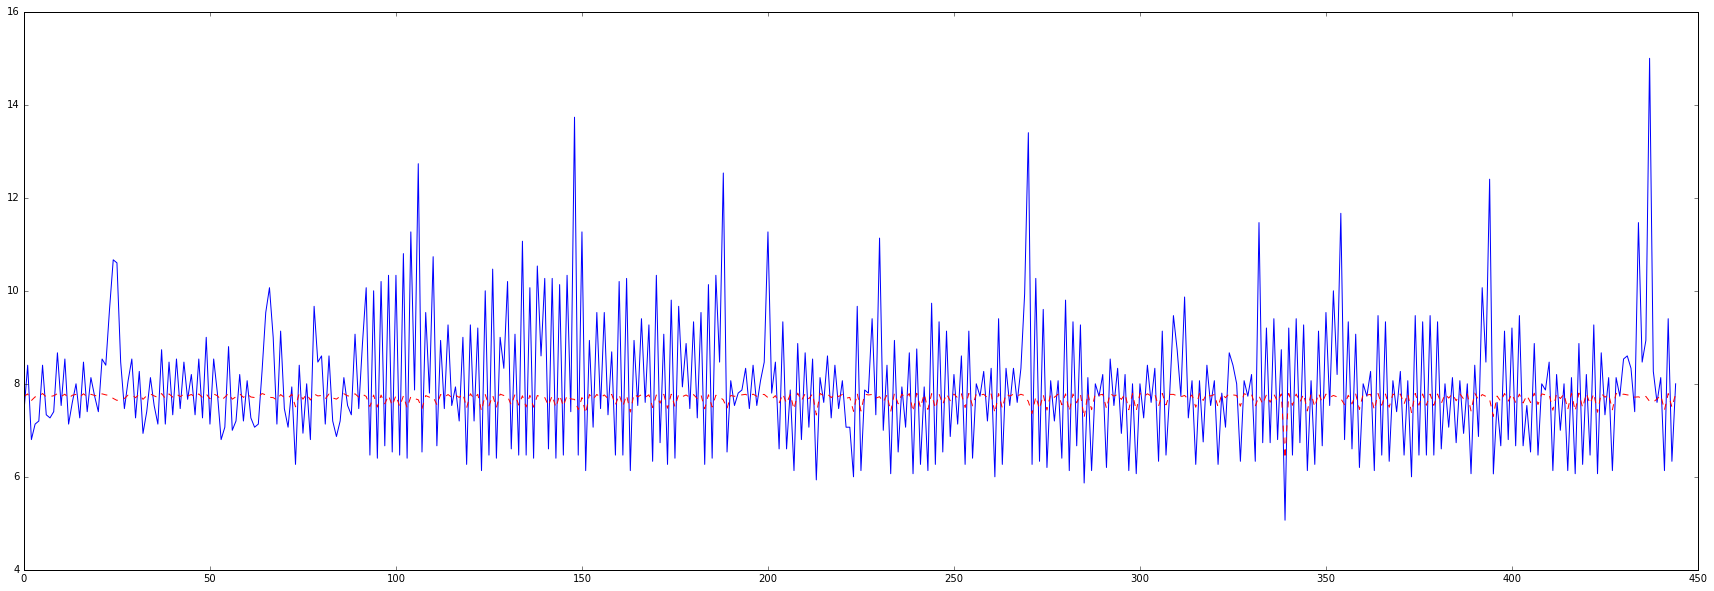

In [256]:

#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([0, 2000, 0, 0.03])
#plt.grid(True)
#plt.axis([0, 1500, 0, 16])
plt.subplots(figsize=(30, 10))
plt.plot(tmps,sample,'b-');# ,tmps,arr,predsscaled,'r*')
#plt.hist(y, 1496 , facecolor='b',)
plt.plot(tmps,arr,'r--')

In [234]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi